In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys

### Let us login to the environment first before we start using the bigquery

In [2]:
! ~/Downloads/google-cloud-sdk/bin/gcloud auth login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&prompt=select_account&response_type=code&client_id=32555940559.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&access_type=offline


If you need to use ADC, see:
  gcloud auth application-default --help

You are now logged in as [pavan.kurapati@gmail.com].
Your current project is [w205-1].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update



## Trips data

In [6]:
# Get the popular trips and store top 5
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as total_trips,start_station_name,end_station_name FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name,end_station_name ORDER BY total_trips DESC LIMIT 5' > popular.csv


Waiting on bqjob_r7923be9e67851a1d_0000016192f47249_1 ... (0s) Current status: DONE   

In [7]:
# Get the popular trips of 'Subscribers'
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as total_trips,start_station_name,end_station_name FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE subscriber_type LIKE "Subscriber" GROUP BY start_station_name,end_station_name ORDER BY total_trips DESC LIMIT 5' > popular_subscriber.csv

Waiting on bqjob_r6d0bc9c47c39b064_0000016192f62fd4_1 ... (0s) Current status: DONE   

In [8]:
# Get the popular trips of 'Customers'
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as total_trips,start_station_name,end_station_name FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE subscriber_type LIKE "Customer" GROUP BY start_station_name,end_station_name ORDER BY total_trips DESC LIMIT 5' > popular_Customer.csv

Waiting on bqjob_r42e02135606bb65d_0000016192f74422_1 ... (3s) Current status: DONE   

Text(0,0.5,'Number of trips')

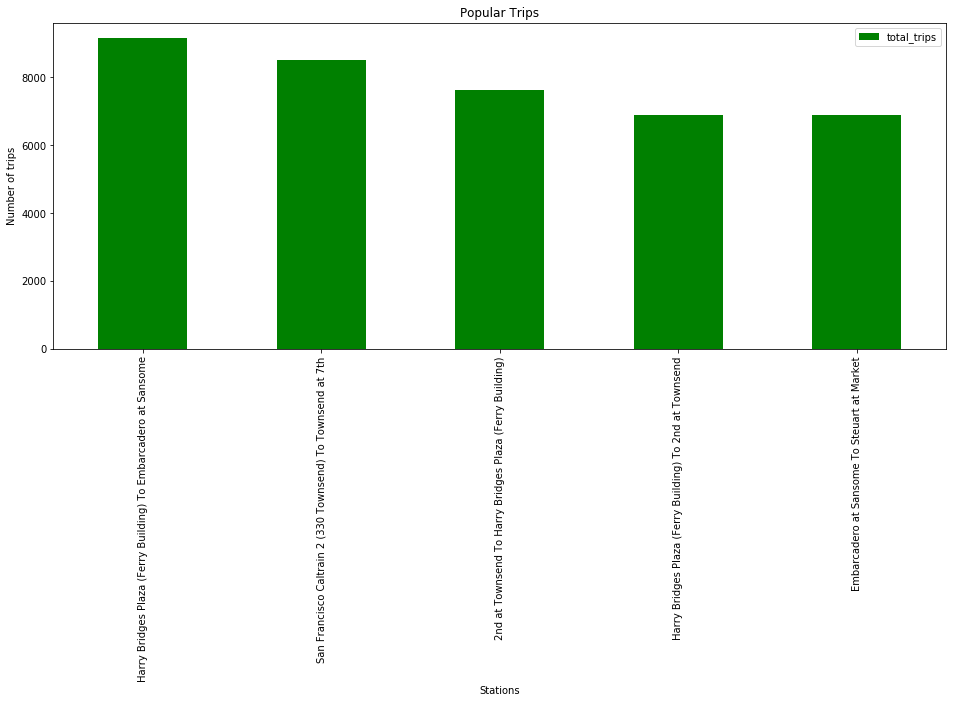

In [16]:
# Read the popular trips and plot top 5
pop_trips=pd.read_csv('popular.csv')
pop_trips['start_end_trip'] = pop_trips['start_station_name'] + " To " + pop_trips['end_station_name']
pop_trips = pop_trips.drop(["start_station_name","end_station_name"],axis=1)
pop_trips.set_index("start_end_trip",inplace=True)
my_colors = ['green','blue','red','darkred','brown']
pop_trips_plot = pop_trips.plot(kind="bar",figsize=(16.0,6.0),title='Popular Trips',color=my_colors,linewidth=2)
pop_trips_plot.set_xlabel('Stations')
pop_trips_plot.set_ylabel('Number of trips')
#plt.gcf()


Text(0,0.5,'Number of trips')

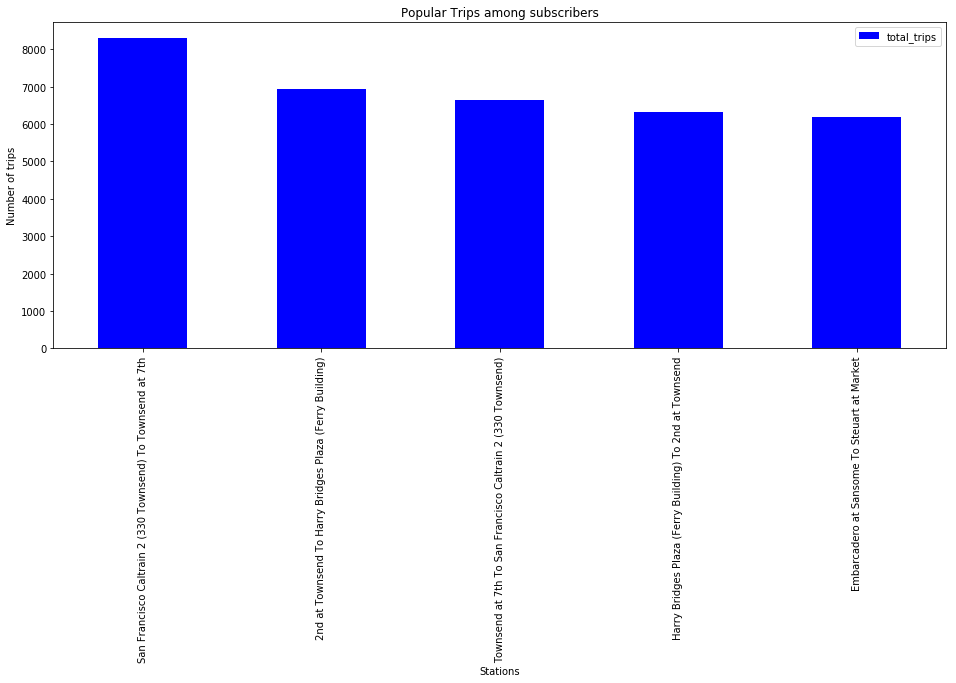

In [22]:
# Read the popular subscriber trips and plot top 5
pop_trips_s=pd.read_csv('popular_subscriber.csv')
pop_trips_s['start_end_trip'] = pop_trips_s['start_station_name'] + " To " + pop_trips_s['end_station_name']
pop_trips_s = pop_trips_s.drop(["start_station_name","end_station_name"],axis=1)
pop_trips_s.set_index("start_end_trip",inplace=True)
my_colors = ['blue']
pop_trips_s_plot = pop_trips_s.plot(kind="bar",figsize=(16.0,6.0),title='Popular Trips among subscribers',color=my_colors,linewidth=2)
pop_trips_s_plot.set_xlabel('Stations')
pop_trips_s_plot.set_ylabel('Number of trips')

Text(0,0.5,'Number of trips')

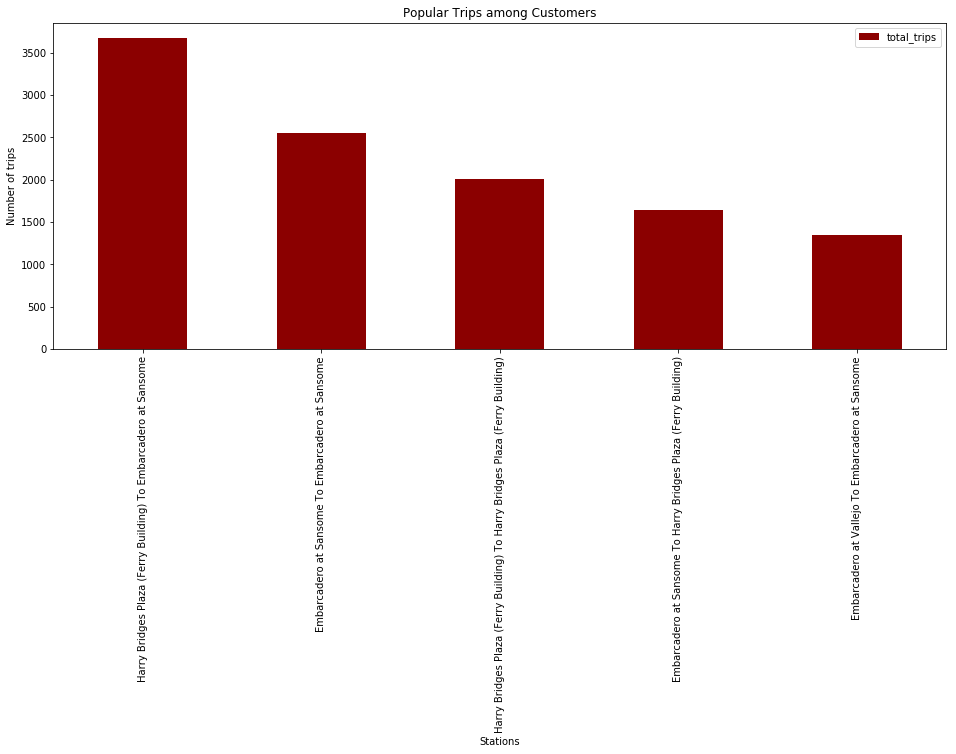

In [23]:
# Read the popular customers trips and plot top 5
pop_trips_c=pd.read_csv('popular_customer.csv')
pop_trips_c['start_end_trip'] = pop_trips_c['start_station_name'] + " To " + pop_trips_c['end_station_name']
pop_trips_c = pop_trips_c.drop(["start_station_name","end_station_name"],axis=1)
pop_trips_c.set_index("start_end_trip",inplace=True)
my_colors = ['darkred']
pop_trips_c_plot = pop_trips_c.plot(kind="bar",figsize=(16.0,6.0),title='Popular Trips among Customers',color=my_colors,linewidth=2)
pop_trips_c_plot.set_xlabel('Stations')
pop_trips_c_plot.set_ylabel('Number of trips')

From the above plots we can infer the below:

1. <font color=blue> Harry Bridges Plaza to Embarcadero </font> is the most popular start & end stations overall. It is also the popular start & end station among non-subscribers (Customers)
2. For subscribers <font color=blue> SanFransisco  Caltrain to Townsend </font> is the most popular start & end station. This is not surprising, considering Caltrain is one of the popular ways to commute.

In [24]:
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name,end_station_name,duration_sec FROM `bigquery-public-data.san_francisco.bikeshare_trips` ORDER BY duration_sec DESC LIMIT 100' > Duration.csv

Waiting on bqjob_r56596bbf7c1c76d2_000001619315120e_1 ... (0s) Current status: DONE   

In [29]:
# Let us find the trips by their duration and see which trip takes the longest duration

trip_duration=pd.read_csv('Duration.csv')
trip_duration['start_end_trip'] = trip_duration['start_station_name'] + " To " + trip_duration['end_station_name']
trip_duration = trip_duration.drop(["start_station_name","end_station_name"],axis=1)
trip_duration.set_index("start_end_trip",inplace=True)
trip_duration['duration_hours'] = trip_duration.duration_sec/3600
trip_duration['duration_days'] = (trip_duration.duration_sec/3600)//24


In [30]:
trip_duration.head()

,duration_sec,duration_hours,duration_days
start_end_trip,,,
South Van Ness at Market To 2nd at Folsom,17270400,4797.333333,199.0
Market at Sansome To Yerba Buena Center of the Arts (3rd @ Howard),2137000,593.611111,24.0
San Antonio Shopping Center To Castro Street and El Camino Real,1852590,514.608333,21.0
University and Emerson To University and Emerson,1133540,314.872222,13.0
University and Emerson To University and Emerson,722236,200.621111,8.0


It appears that the first entry "South Van Ness at Market" is an outlier where the bike was held for 199 days. We should safely remove that trip as the rest seem more reasonable.

Out of the rest, it appears that University and Emerson is showing up twice, with duration of 13 days and 8 days. 

In [53]:
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as trips_more_than_1day FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec >86400' > day_and_above.csv

Waiting on bqjob_r4ca37bbeddfd2c16_000001619803944c_1 ... (0s) Current status: DONE   

Out of total 983648 trips, only 296 trips are more than a day. So let us consider these as outliers

In [54]:
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as trips_1to10mins FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec >= 60 AND duration_sec <= 600' > min_10min.csv

Waiting on bqjob_r64f2f729b73ba60d_00000161980455c6_1 ... (0s) Current status: DONE   

In [55]:
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as trips_10mto1hr FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec > 600 AND duration_sec <= 3600' > TenMin_1hr.csv

Waiting on bqjob_r2ef5c99eb5dce5f8_000001619804e4f7_1 ... (0s) Current status: DONE   

In [56]:
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as trips_1hrto1day FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec > 3600 AND duration_sec <= 86400' > OneHour_to_day.csv

Waiting on bqjob_r4e5be32f1e35510c_0000016198054cf2_1 ... (0s) Current status: DONE   

In [51]:
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as trips_10mto1hr FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec > 600 AND duration_sec <= 3600' > trips_10_1hr.csv

Waiting on bqjob_r41701050ca3cce2_0000016197ffd33c_1 ... (0s) Current status: DONE   

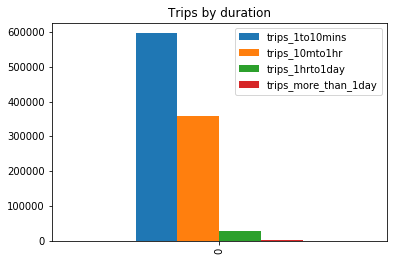

In [60]:
pd_10_1 = pd.read_csv('day_and_above.csv')
pd_10_2 = pd.read_csv('min_10min.csv')
pd_10_3 = pd.read_csv('TenMin_1hr.csv')
pd_10_4 = pd.read_csv('OneHour_to_day.csv')
pd_durations = pd.concat([pd_10_2,pd_10_3,pd_10_4,pd_10_1],axis=1)
pd_durations.plot(kind="bar",title="Trips by duration")

As can be observed from above, 60% of trips are in 1 min to 10 mins range. 

36% of trips are in 10 mins to 1 hour range.

Trips more than 1 hour are very small in percentage and can be ignored.

In [66]:
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as trips,subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec > 600 AND duration_sec <= 3600 GROUP BY subscriber_type ORDER BY trips DESC' > subscriber_10m_1hr.csv 

Waiting on bqjob_r2fc2ef2f6f24a6db_000001619817ba95_1 ... (0s) Current status: DONE   

In [70]:
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as trips,subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec >= 60 AND duration_sec <= 600 GROUP BY subscriber_type ORDER BY trips DESC' > subscriber_1m_10m.csv 

Waiting on bqjob_r5bb49ddf4e8f5000_00000161981a7cf4_1 ... (0s) Current status: DONE   

In [71]:
pd_subscriber_1_10 = pd.read_csv('subscriber_1m_10m.csv')
pd_subscriber_1_10.set_index("subscriber_type",inplace=True)
pd_subscriber_10_1 = pd.read_csv('subscriber_10m_1hr.csv')
pd_subscriber_10_1.set_index("subscriber_type",inplace=True)

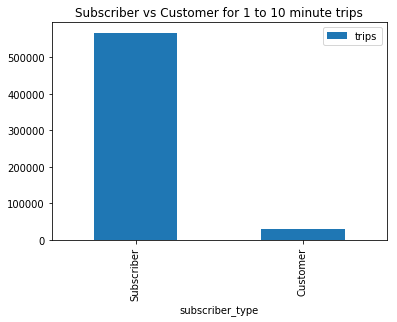

In [72]:
pd_subscriber_1_10.plot(kind="bar",title="Subscriber vs Customer for 1 to 10 minute trips")

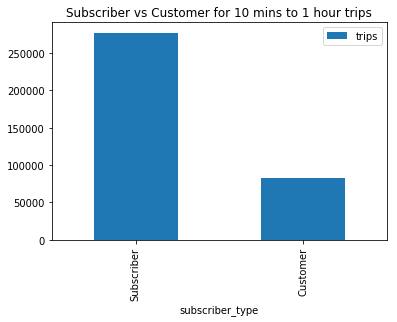

In [73]:
pd_subscriber_10_1.plot(kind="bar",title="Subscriber vs Customer for 10 mins to 1 hour trips")

From the above graphs, it is clear that subscribers use more trips that are within 1 hour range. While customer numbers are also high, we can improve customer participation by promoting <1 hour deals.

In [31]:
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as total_trips,landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` stations JOIN `bigquery-public-data.san_francisco.bikeshare_trips` trip ON stations.station_id=trip.start_station_id GROUP BY landmark ORDER BY total_trips DESC' > landmark.csv

Waiting on bqjob_r3427be4525945b80_000001619323d7ce_1 ... (1s) Current status: DONE   

In [32]:
# Breaking the number of trips by their landmark

landmark = pd.read_csv('landmark.csv')
landmark.set_index("landmark",inplace=True)
landmark.head()

,total_trips
landmark,
San Francisco,891223
San Jose,52861
Mountain View,24679
Palo Alto,9889
Redwood City,4996


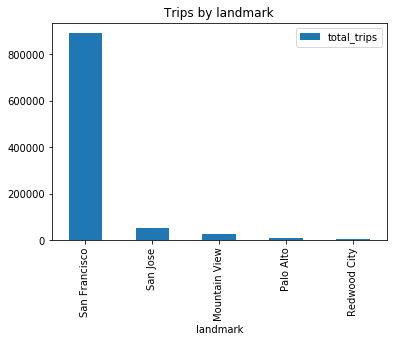

In [33]:
landmark.plot(kind="bar",title="Trips by landmark")

### Which station runs out of bikes more often?

In [36]:
! ~/Downloads/google-cloud-sdk/bin/bq query --use_legacy_sql=FALSE --format=csv  'SELECT name, COUNT(bikes_available) as No_Bikes_Count FROM `bigquery-public-data.san_francisco.bikeshare_status` status JOIN `bigquery-public-data.san_francisco.bikeshare_stations` station ON status.station_id=station.station_id WHERE bikes_available = 0 GROUP BY name ORDER BY No_Bikes_Count DESC LIMIT 10' > empty_bikes.csv

Waiting on bqjob_r42a6a28ad622e642_000001619592c0ee_1 ... (0s) Current status: DONE   

In [37]:
empty_bikes = pd.read_csv('empty_bikes.csv')
empty_bikes.set_index("name",inplace=True)
empty_bikes.head()

,No_Bikes_Count
name,
2nd at Folsom,44844
Commercial at Montgomery,44728
Embarcadero at Vallejo,35903
Embarcadero at Sansome,32980
Clay at Battery,32505


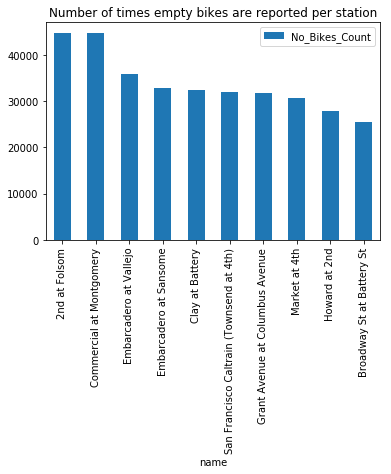

In [38]:
empty_bikes.plot(kind="bar",title="Number of times empty bikes are reported per station")

## Conclusion

1. Harry bridges Plaza is popular among customers and Caltrain is popular among subscribers. Any offer will get benefit if the starting station is one of these two. To start with, offer 50% discount for first one month to customers if they starting at Harry bridges Plaza or Caltrain.

2. Among all the trip durations, most trips (~60%) are within 1 min to 10 min range. 36% of trips are in 10 mins to 1 hour range. 4% is > a day.

3. Out of the above, subscribers use maximum share of the trips. Hence, the recommendation is to make a special offer for 1 month registration with 50% discount to the customers if they return bikes within 10 min on average for entire month. Make a 20% discount if they return bikes within 1 hour. Continue this for an year to convert more customers into subscribers.

4. "2nd at Folsom station" seem to run out of bikes more often. Pick the top 5 as shown in the graph, and work on providing more bikes at these stations.

5. Trips more than a day are very infrequent. Among them University and Emerson showed up twice in top 4. It is possible that University students are keeping the bikes longer.